In [177]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospitals-count-in-india-statewise/Hospitals count in India - Statewise.csv


In [178]:
df = pd.read_csv('/kaggle/input/hospitals-count-in-india-statewise/Hospitals count in India - Statewise.csv')

In [179]:
df.rename(columns={'States/UTs': 'states','Number of hospitals in public sector': 'public_hospitals', 'Number of hospitals in private sector':
                   'private_hospitals', 'Total number of hospitals (public+private)': 'total_hospitals'}, inplace=True)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   states             37 non-null     object
 1   public_hospitals   36 non-null     object
 2   private_hospitals  36 non-null     object
 3   total_hospitals    36 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


In [181]:
df['total_hospitals'] = pd.to_numeric(df['total_hospitals'], errors='coerce')
df['public_hospitals'] = pd.to_numeric(df['public_hospitals'], errors='coerce')
df['private_hospitals'] = pd.to_numeric(df['private_hospitals'], errors='coerce')
df.head()

,states,public_hospitals,private_hospitals,total_hospitals
0,Lakshadweep,9.0,4.0,13.0
1,Chandigarh,9.0,4.0,13.0
2,Dadra & N Haveli,12.0,6.0,18.0
3,Puducherry,14.0,6.0,20.0
4,Daman & Diu,5.0,21.0,26.0


In [182]:
#df['total_hospitals'].plot.hist()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   states             37 non-null     object 
 1   public_hospitals   27 non-null     float64
 2   private_hospitals  26 non-null     float64
 3   total_hospitals    19 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.3+ KB


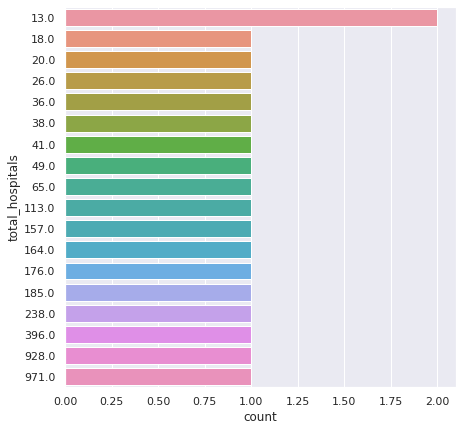

In [183]:
# Let's see Total hospitals status
df_p=df.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="total_hospitals", data=df_p.head(200))

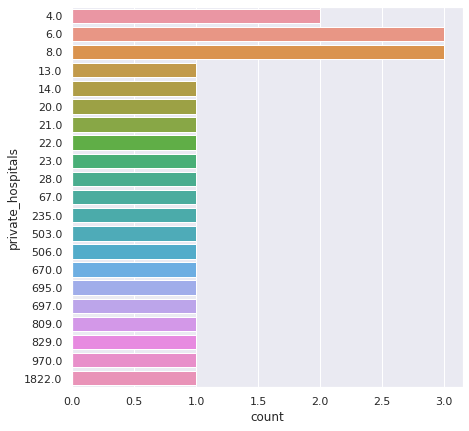

In [184]:
# how about Private hospitals
df_p=df.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="private_hospitals", data=df_p.head(200))

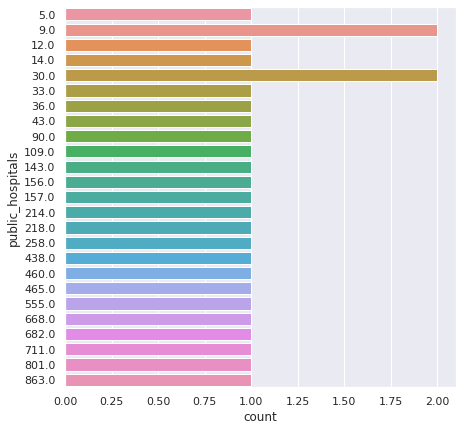

In [185]:
# how about Public hospitals
df_p=df.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="public_hospitals", data=df_p.head(200))

In [186]:
df_c=df.groupby(['states']).count()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Andaman Nicobar Islands to West Bengal
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   public_hospitals   37 non-null     int64
 1   private_hospitals  37 non-null     int64
 2   total_hospitals    37 non-null     int64
dtypes: int64(3)
memory usage: 1.2+ KB


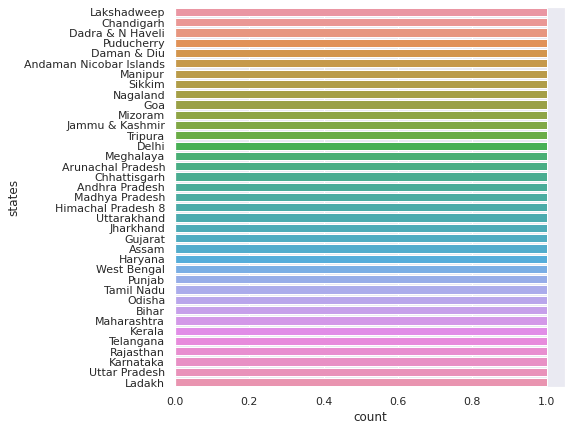

In [187]:
df_c=df.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="states", data=df_p.head(100))

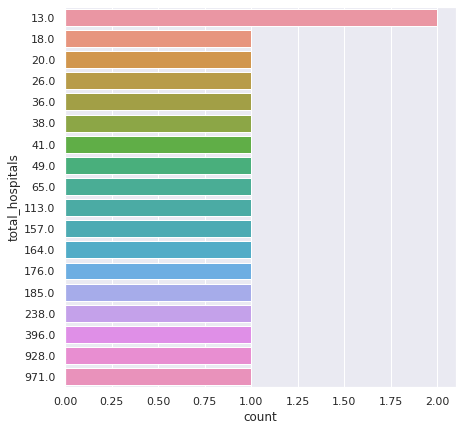

In [188]:
# Count total hospitals
df_p=df.head(100)
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
ax = sns.countplot(y="total_hospitals", data=df_p.head(200))

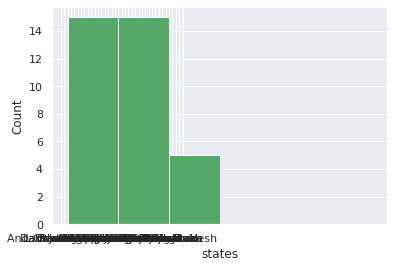

In [209]:
bins=range(2,100,15)
plt.hist(df_p["states"],bins,histtype="bar",rwidth=1.0,color='G')
plt.xlabel('states') #set the x label name
plt.ylabel('Count') #set the y label name
plt.plot()
plt.show()

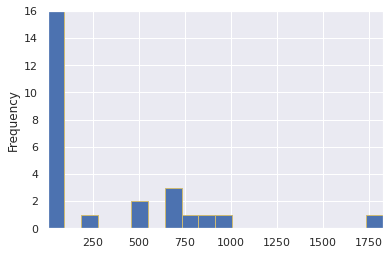

In [190]:
df['private_hospitals'].plot.hist(bins=20,edgecolor='y').autoscale(enable=True,axis='both',tight=True)

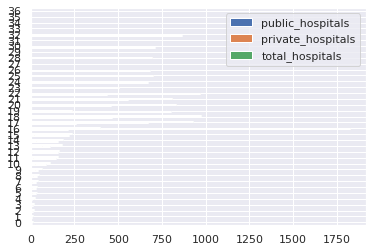

In [191]:
df.plot.barh()

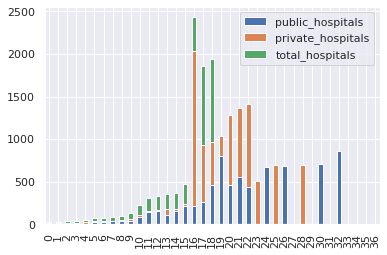

In [192]:
df.plot.bar(stacked=True)

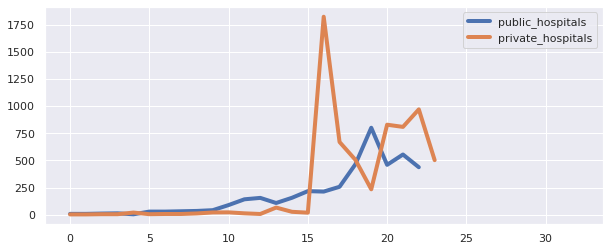

In [193]:
# Ratio of hospitals
df.plot.line(y=['public_hospitals','private_hospitals'],figsize=(10,4),lw=4)

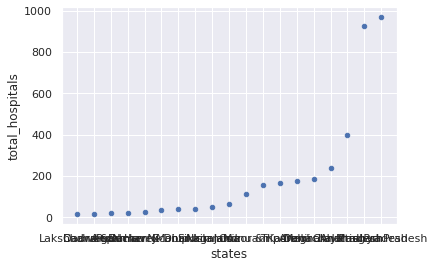

In [194]:
df.plot.scatter(x='states',y='total_hospitals')

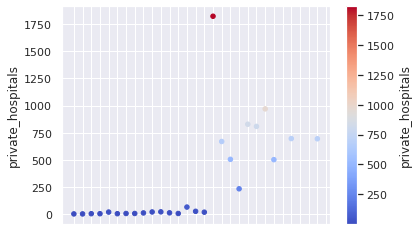

In [195]:
df.plot.scatter(x='states',y='private_hospitals',c='private_hospitals',cmap='coolwarm')

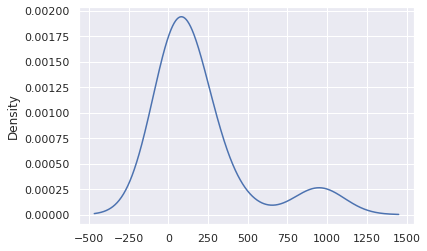

In [196]:
df['total_hospitals'].plot.kde()

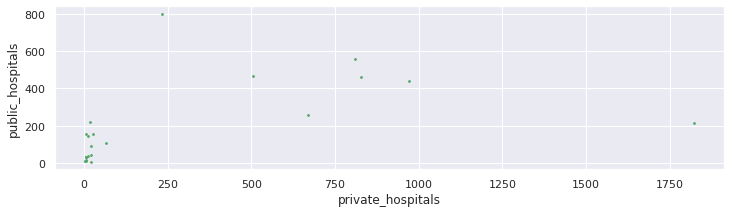

In [197]:
df.plot.scatter(x='private_hospitals',y='public_hospitals',c='g',figsize=(12,3),s=3)

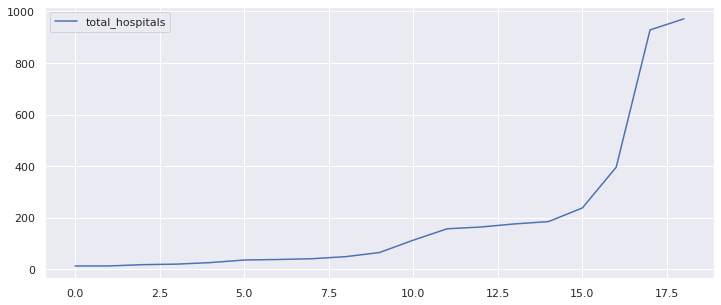

In [198]:
df[['total_hospitals','states']].plot(figsize=(12,5))

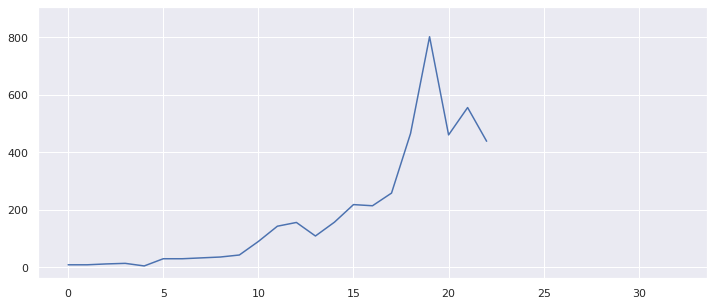

In [199]:
df['public_hospitals'].plot(figsize=(12,5))

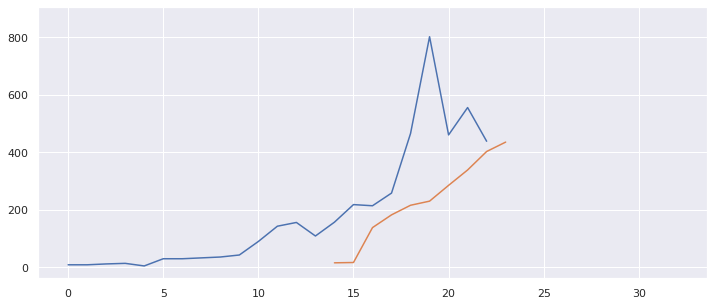

In [200]:
df['public_hospitals'].plot(figsize=(12,5))
df.rolling(window=15).mean()['private_hospitals'].plot()

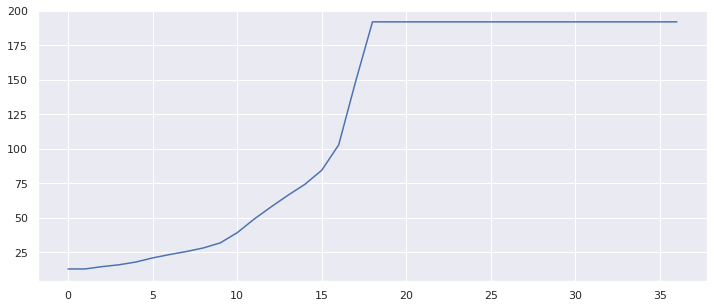

In [201]:
df['total_hospitals'].expanding().mean().plot(figsize=(12,5))

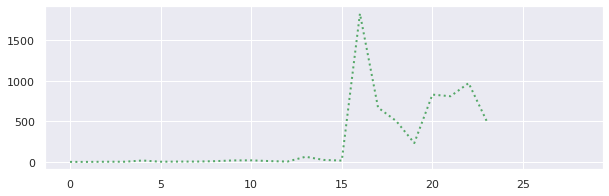

In [202]:
df['private_hospitals'].plot.line(figsize=(10,3),ls=':',c='g',lw=2)

[Text(0, 0.5, 'Private hospitals'), Text(0.5, 0, 'Public hospitals')]

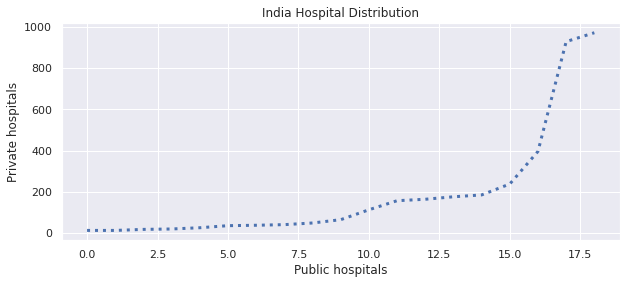

In [203]:
title = "India Hospital Distribution"
xlabel = 'Public hospitals'
ylabel = 'Private hospitals'
ax = df['total_hospitals'].plot.line(figsize=(10,4),ls=':',c='b',lw=3,title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)

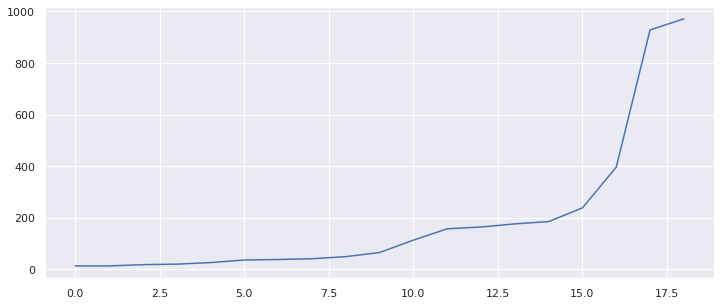

In [204]:
df['total_hospitals'].plot(figsize=(12,5))

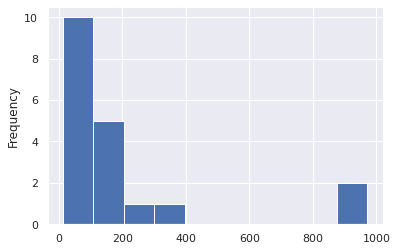

In [205]:
df['total_hospitals'].plot.hist(grid=True)

In [206]:
df.columns

Index(['states', 'public_hospitals', 'private_hospitals', 'total_hospitals'], dtype='object')